<a href="https://colab.research.google.com/github/hsaurs/Projects/blob/main/AI_06_%EC%9C%A0%ED%98%95%EC%84%9D_Project1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
from google.colab import files
uploaded = files.upload()

Saving vgames2.xlsx to vgames2.xlsx


In [3]:
df = pd.read_excel('vgames2.xlsx')

In [4]:
df = df.drop(['Unnamed: 0'],axis=1)

In [5]:
def value_to_float(x):
    if type(x) == float or type(x) == int:
        return x
    if 'K' in x:
        if len(x) > 1:
            return float(x.replace('K',''))* (1/1000)
    if 'M' in x:
        if len(x) > 1:
            return float(x.replace('M',''))

In [6]:
df['NA_Sales'] = df['NA_Sales'].apply(value_to_float)
df['EU_Sales'] = df['EU_Sales'].apply(value_to_float)
df['JP_Sales'] = df['JP_Sales'].apply(value_to_float)
df['Other_Sales'] = df['Other_Sales'].apply(value_to_float)

## Sales 항목 전처리

In [7]:
df.isnull().sum()

## 현 결측치 개수

Name             0
Platform         0
Year           271
Genre            0
Publisher       58
NA_Sales         0
EU_Sales         0
JP_Sales         0
Other_Sales      0
dtype: int64

In [8]:
def year(x):
    if ((x <= 16)&(x>=0.0)):
        return 2000 + x
    elif ((x >= 86)&(x<=98)):
        return 1900 + x
    else:
        return x

In [9]:
df['Year'] = df['Year'].apply(year)

## Year 항목 전처리

In [10]:
df = df.dropna()

## 결측치 제거

In [11]:
df.isnull().sum()

Name           0
Platform       0
Year           0
Genre          0
Publisher      0
NA_Sales       0
EU_Sales       0
JP_Sales       0
Other_Sales    0
dtype: int64

In [12]:
df['Total_Sales'] = df['NA_Sales']+df['EU_Sales']+df['JP_Sales']+df['Other_Sales']
df.head()

## Total_Sales 항목 생성

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Total_Sales
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.83
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.38


In [13]:
df['Genre'].unique()

## Genre 항목 파악

array(['Sports', 'Platform', 'Racing', 'Role-Playing', 'Puzzle', 'Misc',
       'Shooter', 'Simulation', 'Action', 'Fighting', 'Adventure',
       'Strategy'], dtype=object)

In [14]:
labels = ['Sports', 'Platform', 'Racing', 'Role-Playing', 'Puzzle', 'Misc',
       'Shooter', 'Simulation', 'Action', 'Fighting', 'Adventure', 'Strategy']

In [15]:
dfg = df.groupby('Genre').sum()
dfg = dfg.drop(['Year'],axis=1)
NA = dfg['NA_Sales']
EU = dfg['EU_Sales']
JP = dfg['JP_Sales']
OT = dfg['Other_Sales']
dfg

##지역 및 장르 별 매출 총합 계산

,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Total_Sales
Genre,,,,,
Action,860.03,514.43,158.31,184.79,1717.56
Adventure,102.20,64.58,51.90,16.81,235.49
Fighting,220.74,100.00,87.15,36.19,444.08
Misc,394.73,208.15,104.18,72.64,779.70
Platform,445.38,200.63,130.53,51.45,827.99
Puzzle,121.76,50.47,56.29,12.45,240.97
Racing,356.90,236.31,56.61,76.68,726.50
Role-Playing,327.46,188.32,350.55,59.74,926.07
Shooter,574.58,310.23,38.18,101.87,1024.86


In [17]:
NA = NA.sort_values(ascending=False)
EU = EU.sort_values(ascending=False)
JP = JP.sort_values(ascending=False)
OT = OT.sort_values(ascending=False)

## 높은 Value 순으로 정렬

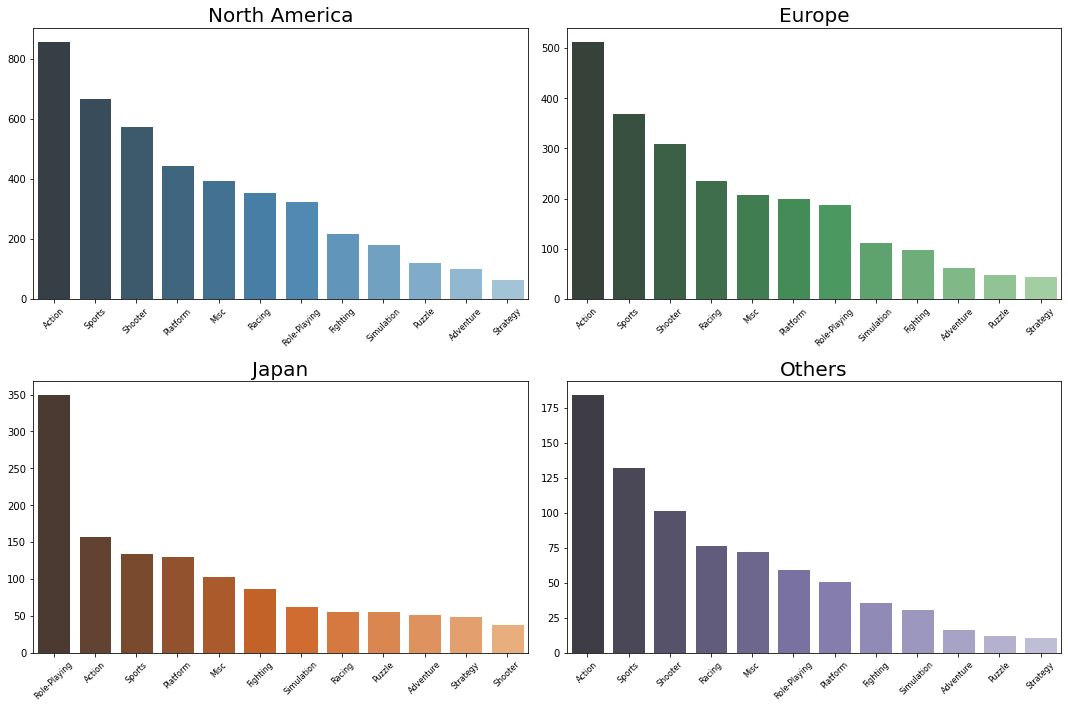

In [18]:
fig = plt.figure(figsize = (15,10))
areaNA = fig.add_subplot(2,2,1)
areaEU = fig.add_subplot(2,2,2)
areaJP = fig.add_subplot(2,2,3)
areaOT = fig.add_subplot(2,2,4)
sns.set(style="whitegrid", color_codes=True)
pal1 = sns.color_palette("Blues_d", len(NA))
pal2 = sns.color_palette("Greens_d", len(EU))
pal3 = sns.color_palette("Oranges_d", len(JP))
pal4 = sns.color_palette("Purples_d", len(OT))

rank = NA.argsort().argsort()
sns.barplot(ax=areaNA, x=NA.index, y=NA, palette=np.array(pal1[::1])[rank])
sns.barplot(ax=areaEU, x=EU.index, y=EU, palette=np.array(pal2[::1])[rank])
sns.barplot(ax=areaJP, x=JP.index, y=JP, palette=np.array(pal3[::1])[rank])
sns.barplot(ax=areaOT, x=OT.index, y=OT, palette=np.array(pal4[::1])[rank])
g1 = sns.barplot(ax=areaNA, x=NA.index, y=NA, palette=np.array(pal1[::1])[rank])
g2 = sns.barplot(ax=areaEU, x=EU.index, y=EU, palette=np.array(pal2[::1])[rank])
g3 = sns.barplot(ax=areaJP, x=JP.index, y=JP, palette=np.array(pal3[::1])[rank])
g4 = sns.barplot(ax=areaOT, x=OT.index, y=OT, palette=np.array(pal4[::1])[rank])
g1.set_xticklabels(g1.get_xticklabels(),rotation=45,size = 8)
g2.set_xticklabels(g2.get_xticklabels(),rotation=45,size = 8)
g3.set_xticklabels(g3.get_xticklabels(),rotation=45,size = 8)
g4.set_xticklabels(g4.get_xticklabels(),rotation=45,size = 8)
g1.set_title("North America",size=20)
g2.set_title("Europe",size=20)
g3.set_title("Japan",size=20)
g4.set_title("Others",size=20)
g1.set_ylabel("")
g2.set_ylabel("")
g3.set_ylabel("")
g4.set_ylabel("")
g1.set_xlabel("")
g2.set_xlabel("")
g3.set_xlabel("")
g4.set_xlabel("")
plt.tight_layout()
plt.show()

## 장르 및 지역별 누적 판매량 시각화

In [19]:
dfg1 = dfg
dfg1 = dfg1.drop(['Total_Sales'],axis=1)
dfg1

,NA_Sales,EU_Sales,JP_Sales,Other_Sales
Genre,,,,
Action,860.03,514.43,158.31,184.79
Adventure,102.20,64.58,51.90,16.81
Fighting,220.74,100.00,87.15,36.19
Misc,394.73,208.15,104.18,72.64
Platform,445.38,200.63,130.53,51.45
Puzzle,121.76,50.47,56.29,12.45
Racing,356.90,236.31,56.61,76.68
Role-Playing,327.46,188.32,350.55,59.74
Shooter,574.58,310.23,38.18,101.87


In [20]:
from scipy import stats
stat, p, dof, expected = stats.chi2_contingency(dfg1)
p

3.696754422481658e-123

In [ ]:
##H0: 지역과 장르 선호도에 관계가 없다.(X)
##Ha: 지역과 장르 선호도에 관계가 있다.(O)
##이원 카이제곱 검정 결과 P 값이 0에 근사하므로 지역과 장르 선호도에 관계가 있다.

In [21]:
df.head()

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Total_Sales
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.83
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.38


In [22]:
dfy = pd.crosstab(df['Genre'],df['Year'])
dfy = dfy.drop([2017.0],axis=1)
dfy = dfy.drop([2020.0],axis=1)
dfy.head()

##2017,2020은 제외한 Year-Genre Crosstab 생성

Year,1980.0,1981.0,1982.0,1983.0,1984.0,1985.0,1986.0,1987.0,1988.0,1989.0,1990.0,1991.0,1992.0,1993.0,1994.0,1995.0,1996.0,1997.0,1998.0,1999.0,2000.0,2001.0,2002.0,2003.0,2004.0,2005.0,2006.0,2007.0,2008.0,2009.0,2010.0,2011.0,2012.0,2013.0,2014.0,2015.0,2016.0
Genre,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Action,1,25,18,7,1,2,6,2,2,2,3,5,1,6,4,8,20,31,44,39,44,67,126,144,125,192,184,210,220,272,227,239,263,148,186,253,118
Adventure,0,0,0,1,0,0,0,1,0,0,0,2,4,1,4,13,17,14,23,20,16,21,42,12,38,42,71,84,168,142,153,107,57,60,75,55,33
Fighting,1,0,0,0,0,1,0,2,0,0,0,1,7,11,22,29,30,28,41,24,29,18,54,44,39,43,55,50,57,53,40,50,29,20,23,21,14
Misc,4,0,1,1,1,0,0,0,0,1,0,1,2,3,6,22,23,12,21,25,20,26,45,53,67,110,109,150,210,207,200,183,38,42,41,39,18
Platform,0,3,5,5,1,4,6,2,4,3,3,6,6,11,11,13,14,18,25,18,24,43,77,87,66,82,54,42,62,28,31,37,11,37,10,14,10


In [23]:
##H0: 발매 년도와 장르는 관계가 없다.(X)
##Ha: 발매 년도와 장르는 관계가 있다.(O)
##이원 카이제곱 검정 결과 P 값이 0에 근사하므로 발매 년도와 장르는 관계가 있다.

In [24]:
stat, p, dof, expected = stats.chi2_contingency(dfy)
p

0.0

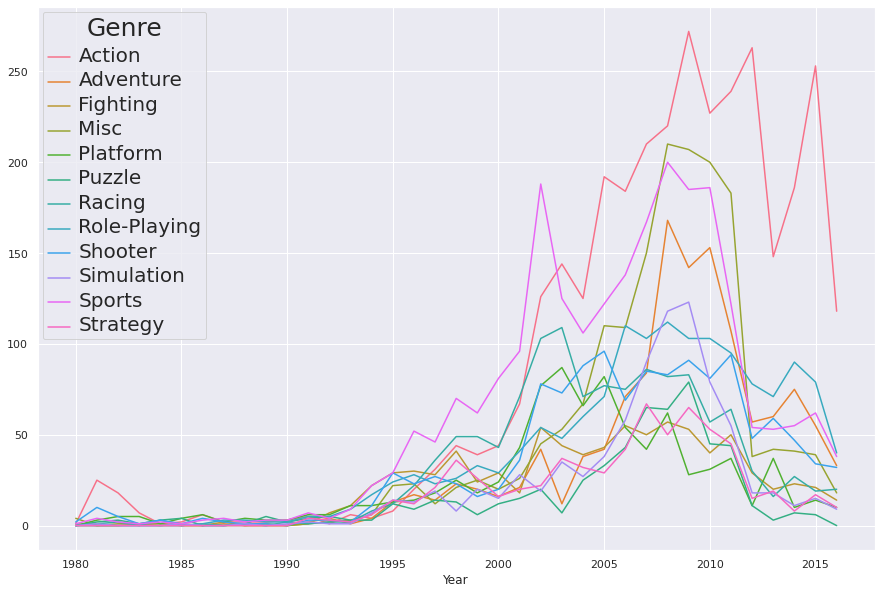

In [25]:
sns.set(rc={'figure.figsize':(15,10)})
sns.set_palette("Accent_r")
ax = sns.lineplot(data=dfy.T,dashes = False, alpha=1);
plt.setp(ax.get_legend().get_texts(),fontsize='20')
plt.setp(ax.get_legend().get_title(),fontsize='25')
sns.set_palette("Accent_r")
plt.show()

## Year에 따른 Genre 별 게임 발매 현황 그래프

In [26]:
dft = df[['Name','Genre','Total_Sales']]
df10 = dft.nlargest(10,['Total_Sales'])
index = df10['Name']
df10 = df10.drop(['Name'],axis=1)
df10.index = index
df10

## Top10 Sales 게임 추출

,Genre,Total_Sales
Name,,
Wii Sports,Sports,82.74
Super Mario Bros.,Platform,40.24
Mario Kart Wii,Racing,35.83
Wii Sports Resort,Sports,33.00
Pokemon Red/Pokemon Blue,Role-Playing,31.38
Tetris,Puzzle,30.26
New Super Mario Bros.,Platform,30.01
Wii Play,Misc,29.01
New Super Mario Bros. Wii,Platform,28.61


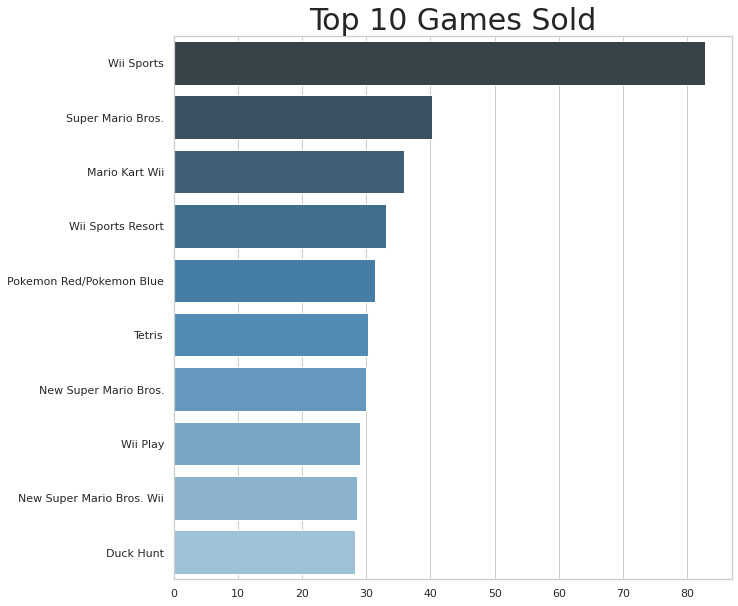

In [27]:
fig = plt.figure(figsize = (10,10))
sns.set(style="whitegrid", color_codes=True)
top10 = df10['Total_Sales']
pal5 = sns.color_palette("Blues_r_d", len(top10))
rank = top10.argsort().argsort()
g5 = sns.barplot(x=top10, y=top10.index, palette=np.array(pal5[::-1])[rank],orient="h")
g5.set_ylabel("")
g5.set_xlabel("")
g5.set_title("Top 10 Games Sold",size = 30)
plt.show()

## Top 10 Sales 게임 시각화

In [28]:
dft = df[['Name','Genre','Total_Sales']]
df100 = dft.nlargest(100,['Total_Sales'])
index = df100['Name']
df100 = df100.drop(['Name'],axis=1)
df100.index = index
df100 = df100.groupby('Genre').count()

## Top 100 Sales 게임 추출

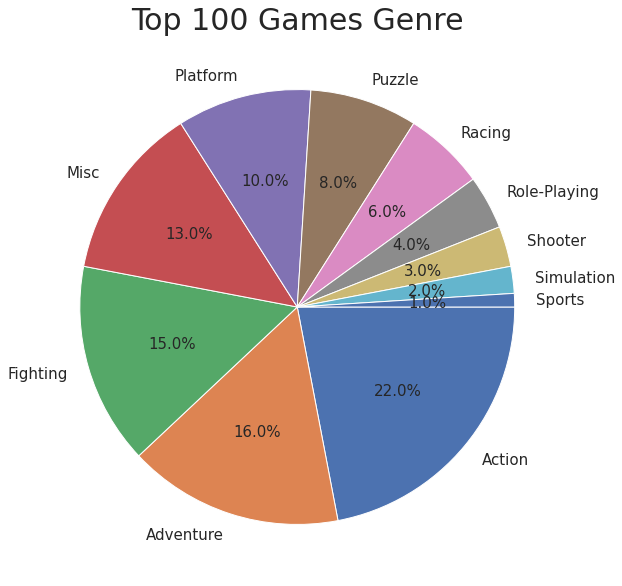

In [29]:
ratio = df100['Total_Sales'].nlargest(100)
labels = df100.index
plt.pie(ratio,labels=labels,autopct='%.1f%%',textprops={'fontsize': 15},counterclock=False);
plt.title("Top 100 Games Genre",size=30)
plt.show()

## Top 100 Sales 게임 시각화 by Genre

In [30]:
## 수익성 판단 위한 가중산술평균 계산

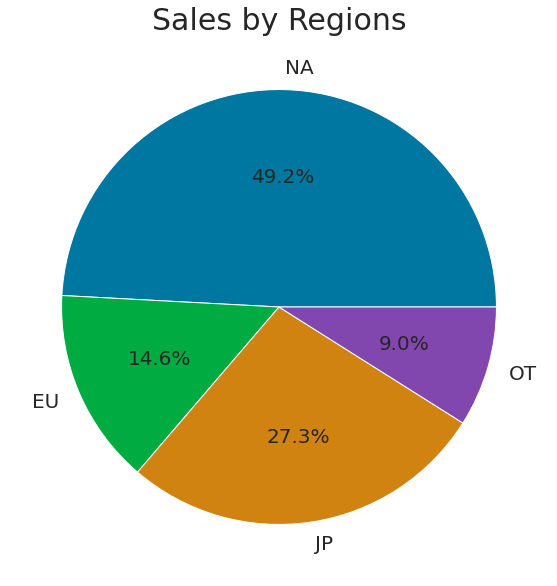

In [31]:
ratio = [df['NA_Sales'].sum(),df['JP_Sales'].sum(),df['EU_Sales'].sum(),df['Other_Sales'].sum()]
colors = ['#0077A0','#00AC41','#D18311','#8246AF']
plt.pie(ratio,labels=["NA","EU","JP","OT"],autopct='%.1f%%',textprops={'fontsize': 20},colors=colors)
plt.title("Sales by Regions",size=30)
plt.show()
#지역 별 총 매출 대비 Pie plot

In [33]:
df.groupby('Genre').mean()

#발매량 대비 매출(매출 평균)

,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Total_Sales
Genre,,,,,,
Action,2007.901109,0.264951,0.158481,0.048771,0.056929,0.529131
Adventure,2008.119906,0.080094,0.050611,0.040674,0.013174,0.184553
Fighting,2004.630383,0.264043,0.119617,0.104246,0.043289,0.531196
Misc,2007.301011,0.234819,0.123825,0.061975,0.043212,0.463831
Platform,2003.804124,0.510172,0.229817,0.149519,0.058935,0.948442
Puzzle,2005.239016,0.213989,0.088699,0.098928,0.021880,0.423497
Racing,2004.831699,0.291585,0.193064,0.046250,0.062647,0.593546
Role-Playing,2007.059864,0.222762,0.128109,0.238469,0.040639,0.629980
Shooter,2005.921936,0.448540,0.242178,0.029805,0.079524,0.800047


In [34]:
dfm = df.groupby('Genre').mean()
dfm = dfm.drop(['Year','Total_Sales'],axis=1)
dfm['Weighted'] = (dfm['NA_Sales']*0.492) + (dfm['EU_Sales']*0.146) + (dfm['JP_Sales']*0.273) + (dfm['Other_Sales']*0.09)

In [35]:
index = dfm.index
dfm1 = dfm.nlargest(12,['Weighted'])
dfm1['Weighted']

#지역 별 가중치를 곱한 가중 평균 계산

Genre
Platform        0.330681
Shooter         0.271334
Role-Playing    0.197062
Racing          0.189912
Sports          0.187697
Fighting        0.179729
Action          0.171932
Misc            0.154417
Simulation      0.148848
Puzzle          0.147210
Strategy        0.081014
Adventure       0.059085
Name: Weighted, dtype: float64

In [36]:
## Platform 혹은 Shooter 장르가 기대 수익이 높음

In [37]:
dfy1 = pd.crosstab(df['Genre'],df['Year'])
dfy1 = dfy1.drop([2017.0,2020.0],axis=1)
dfy2 = dfy1.iloc[:,[26,27,28,29,30,31,32,33,34,35,36]]

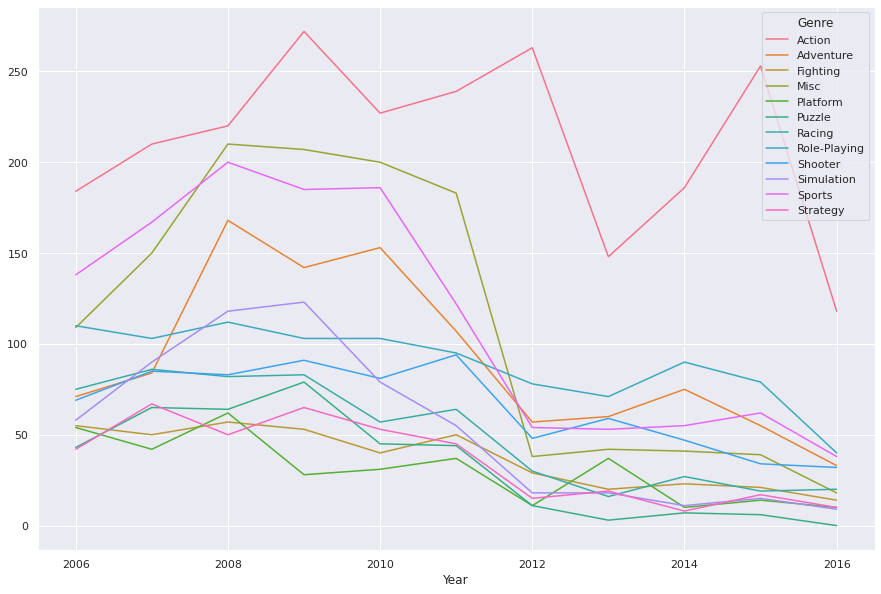

In [38]:
sns.set(rc={'figure.figsize':(15,10)})
sns.set_palette("Accent_r")
ax1 = sns.lineplot(data=dfy2.T,dashes = False, alpha=1)
plt.setp(ax.get_legend().get_texts(),fontsize='20')
plt.setp(ax.get_legend().get_title(),fontsize='25')
sns.set_palette("Accent_r")
plt.show()

## 최근 10년 간 게임 장르 별 발매 트렌드